In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from datetime import timedelta
from datetime import datetime

In [2]:
import json
import branca.colormap as cm
import folium

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

In [5]:
yellow_2018_06=pd.read_csv('yellow_tripdata_2018-06.csv',encoding='latin1')
taxi_zones=pd.read_csv('taxi_zone_lookup.csv',encoding='latin1')
yellow_tz_2018_06 = yellow_2018_06.merge(taxi_zones,left_on='PULocationID', right_on='LocationID')

In [6]:
borough_list=['Bronx','Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Unknown']

In [7]:
fare_per_mile = yellow_tz_2018_06[['total_amount', 'trip_distance']]

In [11]:
yellow_df_dol = yellow_tz_2018_06.merge(taxi_zones,left_on='DOLocationID', right_on='LocationID')

In [15]:
yellow_df_dol

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,LocationID_x,Borough_x,Zone_x,service_zone_x,LocationID_y,Borough_y,Zone_y,service_zone_y
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,...,0.3,4.30,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
1,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,...,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
2,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,...,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
3,2,2018-06-01 00:35:11,2018-06-01 00:35:16,2,0.00,2,N,145,145,2,...,0.3,52.80,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
4,1,2018-06-01 01:35:00,2018-06-01 01:35:59,1,0.00,1,N,145,145,2,...,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
5,2,2018-06-01 01:41:19,2018-06-01 01:41:22,3,0.00,5,N,145,145,1,...,0.3,64.56,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
6,1,2018-06-01 02:17:18,2018-06-01 02:17:55,1,0.90,1,N,145,145,3,...,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
7,2,2018-06-01 02:50:03,2018-06-01 02:50:06,1,0.00,5,N,145,145,1,...,0.3,14.60,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
8,1,2018-06-01 04:04:10,2018-06-01 04:04:21,1,0.00,1,N,145,145,2,...,0.3,3.80,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone
9,2,2018-06-01 05:37:19,2018-06-01 05:37:22,1,0.00,5,N,145,145,1,...,0.3,14.12,145,Queens,Long Island City/Hunters Point,Boro Zone,145,Queens,Long Island City/Hunters Point,Boro Zone


In [9]:
# columns tpep_pickup_datetime and tpep_dropoff_datetime are in string format
# to caclulate duration of the ride we need to convert them to date format which can be done using strptime function from datetime
yellow_tz_2018_06['tpep_dropoff_datetime'] = yellow_tz_2018_06['tpep_dropoff_datetime'].map(lambda tpep_dropoff_datetime: datetime.strptime(tpep_dropoff_datetime, "%Y-%m-%d %H:%M:%S"))
yellow_tz_2018_06['tpep_pickup_datetime'] = yellow_tz_2018_06['tpep_pickup_datetime'].map(lambda tpep_pickup_datetime: datetime.strptime(tpep_pickup_datetime, "%Y-%m-%d %H:%M:%S"))

In [16]:
dol_column = pd.Series(yellow_df_dol['Borough_y'])
pul_column = pd.Series(yellow_tz_2018_06['Borough'])

In [17]:
fare_per_mile.loc[:,'pick_up_zone'] = pul_column
fare_per_mile.loc[:,'drop_off_zone'] = dol_column

C:\Users\Alessandra\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Alessandra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [18]:
trip_duration = pd.Series((yellow_tz_2018_06['tpep_dropoff_datetime']-yellow_tz_2018_06['tpep_pickup_datetime'])/timedelta(minutes=1))
fare_per_mile.loc[:,'trip_duration'] = trip_duration

C:\Users\Alessandra\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Alessandra\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [19]:
fare_per_mile = fare_per_mile[fare_per_mile['trip_distance']!=0]
fare_per_mile = fare_per_mile[fare_per_mile['total_amount'] > 0]
fare_per_mile = fare_per_mile[fare_per_mile['trip_duration'] > 0]
# fare_per_mile = fare_per_mile[fare_per_mile['trip_duration'] < 80]

In [20]:
price_per_mile = fare_per_mile['total_amount']/fare_per_mile['trip_distance']
fare_per_mile.loc[:,'price_per_mile'] = price_per_mile

Creating the last column about the price, but weighted using time

In [21]:
weighted_price = fare_per_mile['total_amount']/fare_per_mile['trip_duration']

In [22]:
fare_per_mile.loc[:,'weighted_price'] = weighted_price

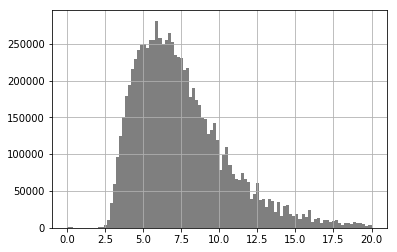

In [23]:
df_plot = fare_per_mile.loc[fare_per_mile["price_per_mile"]<20]
df_plot['price_per_mile'].hist(color='k', alpha=0.5, bins=100)

In [24]:
fare_per_mile['price_per_mile'].mean()

9.221174362059624

In [25]:
fare_per_mile['price_per_mile'].std()

75.04423903105356

In [26]:
result_mu = fare_per_mile.groupby(['pick_up_zone'])['price_per_mile'].mean()

In [27]:
result_mu

pick_up_zone
Bronx              12.105254
Brooklyn            7.703176
EWR              1099.052697
Manhattan           8.876857
Queens              9.506490
Staten Island      17.732259
Unknown            30.582316
Name: price_per_mile, dtype: float64

In [28]:
result_std = fare_per_mile.groupby(['pick_up_zone'])['price_per_mile'].std()

In [29]:
result_std

pick_up_zone
Bronx             184.790501
Brooklyn           58.170532
EWR              2833.009163
Manhattan          51.057123
Queens            145.017404
Staten Island      39.652810
Unknown           345.825145
Name: price_per_mile, dtype: float64

In [93]:
d_ppm = {}   #dictionary price per mile, it sort for each borough the list of 
for row in fare_for_mile.iterrows():
    

Bronx


C:\Users\Alessandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


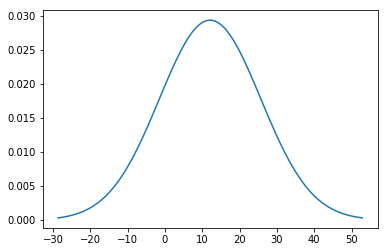

Brooklyn


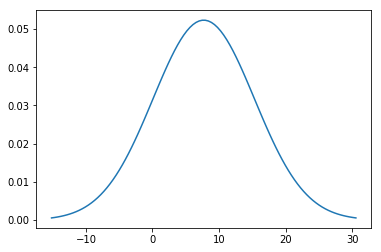

EWR


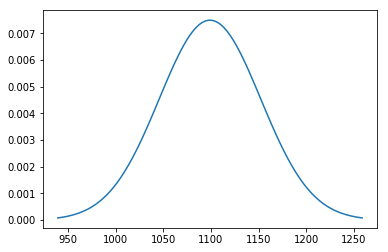

Manhattan


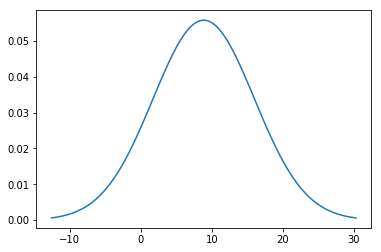

Queens


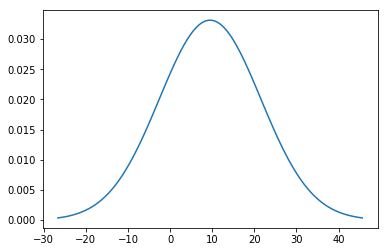

Staten Island


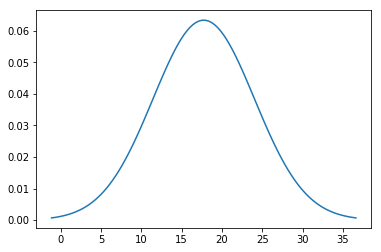

Unknown


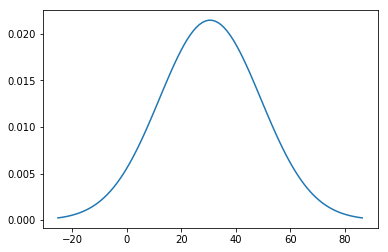

In [30]:
l=len(result_mu)
for i in range(l):
    mu = result_mu[i]
    variance = result_std[i]
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    print(borough_list[i])
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.show()

We made the graphs for each mean and standard deviation using Normal distribution, we saw that the trend is similar for each borough, but the interval of values are not always the same. It depends on mu and sigma values.

H0 : the Taxi trip fare for the two considered boroughs are similar.

When t-test returns that pvalue is less than statistic value, it means that the variances are different.
So our hypotesis H0 is rejected. The Taxis trip fares are different between boroughs.
Otherwise, the variances are similar, so the hypotesis cannot be rejected.

In [96]:
fare_per_mile[fare_per_mile.pick_up_zone=='Bronx']['price_per_mile'][:100]

8621951     4.529915
8621952     7.000000
8621953     3.978088
8621954     6.636364
8621955     6.636364
8621956     4.528796
8621957     5.961538
8621958     4.542222
8621959     5.627530
8621960     3.703297
8621961     6.423358
8621962     3.771580
8621963     3.582353
8621964     8.791667
8621965     5.870647
8621966     5.370629
8621967     4.894737
8621969     5.157895
8621970     3.578709
8621971    14.333333
8621972     2.934519
8621973     4.048421
8621974     3.694444
8621975     5.204082
8621976     3.417808
8621977     6.666667
8621979     3.254637
8621980     7.722222
8621981     3.344017
8621982    11.777778
             ...    
8622023     4.118457
8622024     7.153846
8622026     3.501684
8622027    63.333333
8622028     8.390805
8622029     3.616963
8622030     6.910112
8622031     3.887939
8622032    12.608696
8622033     3.413102
8622034     4.900000
8622035     7.555556
8622037     6.938776
8622038     4.793814
8622039     5.470588
8622040     3.874138
8622041     3

In [97]:
n1_1=0
n1_2=0
for i in range(0,6):
    for j in range(i+1,6):
        
        statistic, pvalue =  ttest_ind(fare_per_mile[fare_per_mile.pick_up_zone==borough_list[i]]['price_per_mile'][:100], fare_per_mile[fare_per_mile.pick_up_zone==borough_list[j]]['price_per_mile'][:100])
        print(statistic, pvalue)
        if pvalue < statistic :
            n1_1+=1
            print(' pv < sv',borough_list[i], 'and',borough_list[j])
        else:
            n1_2+=1
            print(' pv > sv',borough_list[i], 'and', borough_list[j])
    print('\n')

0.17908196462386977 0.8580564606949568
 pv > sv Bronx and Brooklyn
-4.158421703606927 4.770743605806036e-05
 pv > sv Bronx and EWR
-0.9782293874079244 0.32915458491823435
 pv > sv Bronx and Manhattan
-2.474850044983582 0.014169636537349345
 pv > sv Bronx and Queens
-3.237930428804893 0.0014117426481464771
 pv > sv Bronx and Staten Island


-4.158870646545022 4.762133176813724e-05
 pv > sv Brooklyn and EWR
-1.5251213431410968 0.12882452891030374
 pv > sv Brooklyn and Manhattan
-2.609637695166139 0.00975625008205919
 pv > sv Brooklyn and Queens
-3.2890272118131283 0.0011898217408998
 pv > sv Brooklyn and Staten Island


4.155974496339354 4.8179415309274046e-05
 pv < sv EWR and Manhattan
4.140937428758345 5.117890704604858e-05
 pv < sv EWR and Queens
4.110719799256831 5.775435713898652e-05
 pv < sv EWR and Staten Island


-2.182490211528534 0.030250075572466884
 pv > sv Manhattan and Queens
-3.088317239736041 0.002301936723974685
 pv > sv Manhattan and Staten Island


-1.8754751509198546 

Another new column with  P' = P / T, where P is price per mile and T is the time duration (for each trip)

In [32]:
result_mu_2 = fare_per_mile.groupby(['pick_up_zone'])['weighted_price'].mean()

In [33]:
result_std_2 = fare_per_mile.groupby(['pick_up_zone'])['weighted_price'].std()

Bronx


C:\Users\Alessandra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


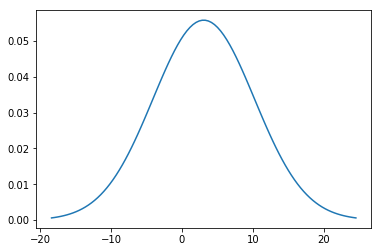

Brooklyn


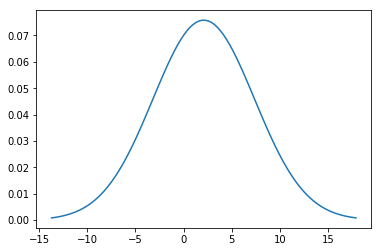

EWR


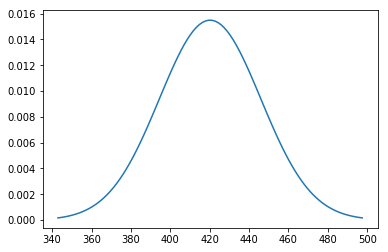

Manhattan


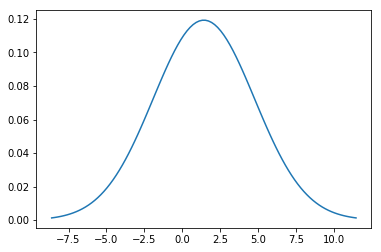

Queens


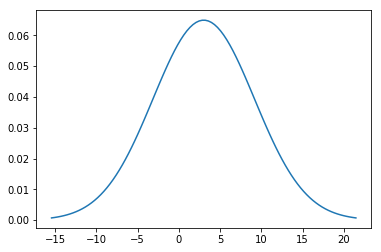

Staten Island


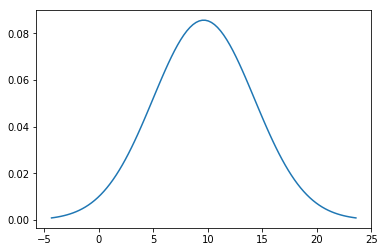

In [34]:
l=len(result_mu_2)
for i in range(l-1):  #not plotted for the last that is unknown 
    mu = result_mu_2[i]
    variance = result_std_2[i]
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    print(borough_list[i])
    plt.plot(x,mlab.normpdf(x, mu, sigma))
    plt.show()

In [100]:
n2_1, n2_2 = 0,0
for i in range(0,6):   #cut unknown using this range
    for j in range(i+1,6):  
        
        statistic, pvalue =  ttest_ind(fare_per_mile[fare_per_mile.pick_up_zone==borough_list[i]]['weighted_price'][:100], fare_per_mile[fare_per_mile.pick_up_zone==borough_list[j]]['weighted_price'][:100])
        print(statistic, pvalue)
        if pvalue < statistic :
            n2_1+=1
            print('pv < sv',borough_list[i], 'and',borough_list[j])
        else:
            n2_2+=1
            print('pv > sv')
            print(borough_list[i], 'and', borough_list[j])
    print('\n')

-0.856291577739886 0.3928716261678593
pv > sv
Bronx and Brooklyn
-6.521124633433566 5.684745106643298e-10
pv > sv
Bronx and EWR
-0.7840484812487866 0.4339486118855729
pv > sv
Bronx and Manhattan
-2.692193848815414 0.007706234188683875
pv > sv
Bronx and Queens
-3.882890467534539 0.00014060899189099286
pv > sv
Bronx and Staten Island


-6.519422996656314 5.738076858181661e-10
pv > sv
Brooklyn and EWR
-0.41684751659430025 0.6772415110946286
pv > sv
Brooklyn and Manhattan
-2.509957496991122 0.012875478970847544
pv > sv
Brooklyn and Queens
-3.8291154227424737 0.00017249937526645303
pv > sv
Brooklyn and Staten Island


6.517284746556222 5.805790512611803e-10
pv < sv EWR and Manhattan
6.492790602919505 6.63977776370049e-10
pv < sv EWR and Queens
6.388262398275135 1.1732995592459885e-09
pv < sv EWR and Staten Island


-2.1326163875184165 0.03418783562293232
pv > sv
Manhattan and Queens
-3.7346786026040877 0.00024570274764464003
pv > sv
Manhattan and Staten Island


-2.907015440829707 0.0040649

In [99]:
print('First test: price per mile')
print('number of different variances between borough:',n1_1)
print('number of same variances between borough:',n1_1)
print('Second test: weighted price')
print('number of different variances between borough:',n2_1)
print('number of same variances between borough:',n2_2)

First test: price per mile
number of different variances between borough: 3
number of same variances between borough: 3
Second test: weighted price
number of different variances between borough: 3
number of same variances between borough: 12


The price per mile ttests have the same number for what concerns variances similarities and differences

For the weighted (by time) prices, it's more common to have more couples of boroughs with the same variance 

In [37]:
tz = os.path.join('', 'taxi_zones.json')
geo_json_data = json.load(open(tz))

In [38]:
index = np.linspace(0, len(fare_per_mile)-1, num=len(fare_per_mile))

In [67]:
fare_per_mile_dict = fare_per_mile.set_index('pick_up_zone')
#fare_per_mile_dict = fare_per_mile.set_index(index)['drop_off_zone'] 

In [65]:
fare_per_mile

,total_amount,trip_distance,pick_up_zone,drop_off_zone,trip_duration,price_per_mile,weighted_price
3,13.80,3.21,Queens,Queens,11.983333,4.299065,1.151599
4,25.75,6.60,Queens,Queens,16.400000,3.901515,1.570122
5,8.75,1.20,Queens,Queens,3.666667,7.291667,2.386364
6,17.80,5.40,Queens,Queens,14.750000,3.296296,1.206780
7,33.30,11.87,Queens,Queens,14.900000,2.805392,2.234899
8,7.80,0.90,Queens,Queens,6.516667,8.666667,1.196931
9,23.80,7.20,Queens,Queens,16.666667,3.305556,1.428000
10,8.16,1.18,Queens,Queens,3.850000,6.915254,2.119481
11,14.75,2.70,Queens,Queens,11.216667,5.462963,1.315007
12,31.30,9.50,Queens,Queens,19.483333,3.294737,1.606501


In [48]:
d={}
for el in fare_per_mile_dict:
    if el not in d:
        d[el]=1
    else:
        d[el]+=1

In [76]:
diction=fare_per_mile.groupby(['pick_up_zone'])

In [77]:
diction

In [54]:
av=sum(list(d.values()))/len(list(d.keys()))

In [58]:
av/2

617769.9285714285

In [73]:
def my_color_function(feature):
    if fare_per_mile_dict['pick_up_zone'] < 310000 :
        return '#81cc93'
    elif d['id'] < 617770:
        return '#2daa4b'
    else:
        return '#0d3316'

        
    
m = folium.Map([43, -100], tiles='cartodbpositron', zoom_start=4)

folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

#m.save(os.path.join('results', 'Colormaps_0.html'))
m

KeyError: 'pick_up_zone'

In [83]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
#state_geo = os.path.join('/Users/y.holtz/Desktop/', 'us-states.json')
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')
#state_data = pd.read_csv(state_unemployment)
 
tz = os.path.join('', 'taxi_zones.json')
geo_json_data = json.load(open(tz))


#yellow_2018_06 we have   
    
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=geo_json_data,
 name='choropleth',
 data=fare_per_mile,
 columns=['pick_up_zone'],
 key_on='feature.id',
 #fill_color='YlGn',
 #fill_opacity=0.7,
 #line_opacity=0.2,
 #legend_name=' Rate (%)'
)

folium.LayerControl().add_to(m)


IndexError: list index out of range

In [86]:
tz = os.path.join('', 'taxi_zones.json')
geo_json_data = json.load(open(tz))

map = folium.Map(location=[48, -102], zoom_start=3)

map.geo_json(geo_path= geo_json_data, data=fare_per_mile,
             columns=['pick_up_zone'],
             key_on='feature.id',
             fill_color='BuPu')

AttributeError: 'Map' object has no attribute 'geo_json'

In [ ]:
#del fare_per_mile
#del yellow_tz_2018_06
#del yellow_2018_06
#del taxi_zones